To run this locally, [install Ploomber](https://docs.ploomber.io/en/latest/get-started/quick-start.html) and execute: `ploomber examples -n guides/intro-to-ploomber`

[![binder-logo](https://raw.githubusercontent.com/ploomber/projects/master/_static/open-in-jupyterlab.svg)](https://binder.ploomber.io/v2/gh/ploomber/binder-env/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fploomber%252Fprojects%26urlpath%3Dlab%252Ftree%252Fprojects%252Fguides/intro-to-ploomber%252FREADME.ipynb%26branch%3Dmaster)

Questions? [Ask us on Slack.](https://ploomber.io/community/)


# Intro to Ploomber

## Your first Python pipeline

<!-- start description -->
Introductory tutorial to learn the basics of Ploomber.
<!-- end description -->

## Ploomber Tutorial Intro

**We'll forcast the relation between testing and active covid-19 cases.** 

### We'll see today how you can improve your work:
- Run 100s of notebooks in parallel 
- Parameterize your workflows
- Easily generate HTML/PDF reports

**For a deeper dive**, try the [first-pipeline guide](https://docs.ploomber.io/en/latest/get-started/first-pipeline.html) or the [basic concepts overview](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).
If YAML, Jupyter and notebooks sounds like a distant cousin, please check our [basic concepts guide](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).

## Parallelization

- Ploomber creates a pipeline for you, so you can run independent tasks simultaneously. 

- It also cache the results so you don't have to wait. You can drop the `force=True` (last line) and rerun this cell.

In here we'll train 4 different models simultaneously, and see it in a graph:

In [1]:
from ploomber import DAG
from ploomber.tasks import ShellScript, PythonCallable
from ploomber.products import File
from ploomber.executors import Parallel

from ploomber.spec import DAGSpec
spec = DAGSpec('./pipeline.yaml')
dag = spec.to_dag()
# dag.executor = Parallel()
build = dag.build(force=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

  0%|          | 0/7 [00:00<?, ?it/s]

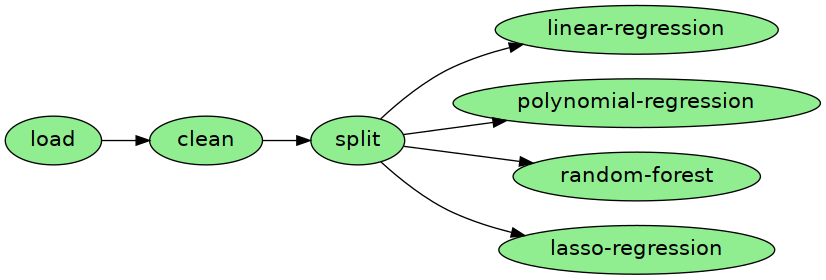

In [2]:
dag.plot()

## Parameterize workflows
- In many cases, you'd run your analysis with different parameters/different data slices
- Ploomber allows you to parametrize workflows easily
- Here we're training a linear regression with different parameters, using a notebook as template

  0%|          | 0/5 [00:00<?, ?it/s]

Executing:   0%|          | 0/6 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

Executing:   0%|          | 0/7 [00:00<?, ?cell/s]

  0%|          | 0/5 [00:00<?, ?it/s]

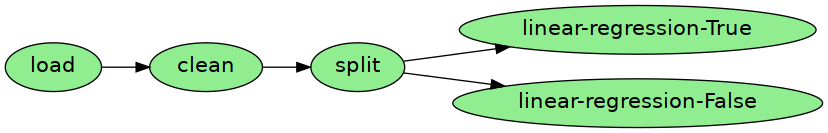

In [3]:
from ploomber.spec import DAGSpec
spec = DAGSpec('./pipeline-params.yaml')
dag = spec.to_dag()
build = dag.build(force=True)
build
dag.plot()

### Caching optimization

Note that the previous table has load ran as fail? 

This task ran in a previous pipeline so there's no point of reruning it. (we can force it to run if needed).

**In the next table, all of the pipeline results were cached** so we can focus on code that changed only, saving hours of compute time.

In [4]:
build = dag.build()
build

0it [00:00, ?it/s]

name,Ran?,Elapsed (s),Percentage
load,False,0,0
clean,False,0,0
split,False,0,0
linear-regression-True,False,0,0
linear-regression-False,False,0,0


## Automated reports

In case we have a dataset to track/a stakeholder report, we can generate it as part of our workflow.
We created the report as part of our first cell pipeline build, so we can consume it immediately.
Let's load our stakeholder report from our previous linear regression task:

In [5]:
# open each specific html report/data if exist
from IPython.display import IFrame, display
from pathlib import Path

report = "./output/linear-regression.html"
if Path(report).is_file():
    display(IFrame(src=report, width='100%', height='500px'))
else:
    print("Report doesn't exist - please run the notebook sequentially")

Report doesn't exist - please run the notebook sequentially

### Interactive reporting

Compare your previous experiments interactively

In [6]:
from sklearn_evaluation import NotebookCollection
# ids to identify each experiment
ids = [
      'linear-regression', 'polynomial-regression', 'random-forest', 'lasso-regression'
]

# output files
files = [f'output/{i}.ipynb' for i in ids]

nbs = NotebookCollection(paths=files, ids=ids)
list(nbs)
nbs['plot']

## Where to go from here

### Use cases

- [Machine Learning](https://docs.ploomber.io/en/latest/use-cases/ml.html)
- [Research Projects](https://docs.ploomber.io/en/latest/use-cases/research.html)
- [Analytics](https://docs.ploomber.io/en/latest/use-cases/analytics.html)
- [SQL Pipelines](https://docs.ploomber.io/en/latest/use-cases/sql.html)

### Community support
Have questions? [Ask us anything on Slack](https://ploomber.io/community/).

### Resources
**Bring your own code!** Check out the tutorial to [migrate your code to Ploomber](https://docs.ploomber.io/en/latest/user-guide/refactoring.html).

Want to dig deeper into Ploomber's core concepts? Check out [the basic concepts tutorial](https://docs.ploomber.io/en/latest/get-started/basic-concepts.html).

Want to start a new project quickly? Check out [how to get examples](https://docs.ploomber.io/en/latest/user-guide/templates.html).